In [22]:
# ridge and lasso regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [24]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

data = fetch_california_housing()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['price'] = data.target

print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [26]:
df['house_age'] = 2026 - df['HouseAge']
df.drop('HouseAge', axis=1, inplace=True)






In [27]:
X = df.drop('price', axis=1)
y = df['price']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [29]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)

ridge.fit(X_train_scaled, y_train)
lasso.fit(X_train_scaled, y_train)

,alpha,0.1
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [31]:
ridge_pred = ridge.predict(X_test_scaled)
lasso_pred = lasso.predict(X_test_scaled)

In [33]:
def evaluate(y_test, pred, model_name):
    print(f"\n{model_name}")
    print("MAE:", mean_absolute_error(y_test, pred))
    print("MSE:", mean_squared_error(y_test, pred))
    print("R2 Score:", r2_score(y_test, pred))

evaluate(y_test, ridge_pred, "Ridge Regression")
evaluate(y_test, lasso_pred, "Lasso Regression")


Ridge Regression
MAE: 0.5331931195789733
MSE: 0.5558548589435973
R2 Score: 0.5758157428913682

Lasso Regression
MAE: 0.6222011579970006
MSE: 0.6796290259444524
R2 Score: 0.48136113440187944


In [34]:
print(y_test.unique())

[0.477   0.458   5.00001 ... 2.668   0.723   1.515  ]


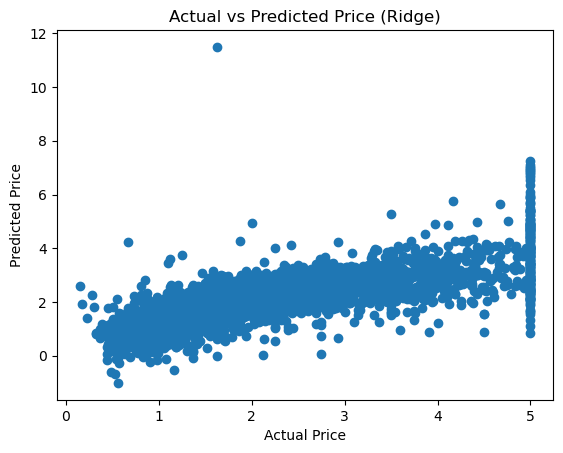

In [35]:
plt.scatter(y_test, ridge_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price (Ridge)")
plt.show()